In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [25]:
#controlliamo che tensorflow sia installato
print(tf.__version__)

2.2.0


In [0]:
#carico il dataset di prova in questo caso incluso nella libreria keras
fashion_mnist = keras.datasets.fashion_mnist
#divido il dataset in train e test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
#le labels sono formate da interi quindi creo un array con il tipo di abito 
#salvato in stringa per poi andarlo a leggere
tipoAbito = ['T-shirt', 'Pantaloni', 'Maglione', 'Vestito', 'Cappotto',
               'Sandali', 'Camicia', 'Scarpe', 'Borsa', 'Stivale']

In [28]:
#nel dataset di train sono contenute 60.000 immagini 
#con una risoluzione di 28X28 pixel
train_images.shape

(60000, 28, 28)

In [29]:
#nel dataset di train sono contenute 10.000 immagini 
#con una risoluzione di 28X28 pixel
test_images.shape

(10000, 28, 28)

In [30]:
#avremo quindi 60.000 labels per il dataset di train
len(train_labels)

60000

In [31]:
#e 10.000 labels per il dataset di test
len(test_labels)

10000

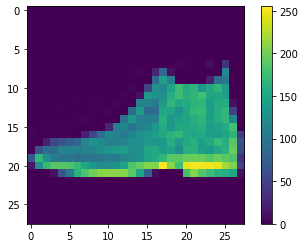

In [32]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#ogni pixel dell'immagine contiene un valore da 0 a 255
#per ottimizare il modello portiamo questi valori ad una scala da 0 a 1
train_images = train_images / 255.0
test_images = test_images / 255.0

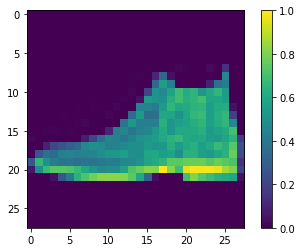

In [34]:
#controlliamo che la scala dei valori sia 0 - 1
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#creiamo quindi il modello
model = keras.Sequential([
    #trasforma l'array bidimensionale di ogni immagine in un array
    #unimensionale dalla lunghezza di 28*28 ovvero 784
    keras.layers.Flatten(input_shape=(28, 28)),
    #creiamo un primo livello composto da 128 neuroni artificiali
    keras.layers.Dense(128, activation='relu'),
    #e un secondo livello che restituirà l'output composto da 10 neuroni artificiali
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
#andiamo quindi a impostare la funzione di ottimizzazione, perdita e le metriche
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
#ora alleniamo il modello specificando il dataset di training, le labels
#ovvero il tipo di abito e il numero di volte che vogliamo che venga ripetuto la funzione di allenamento
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4986 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3768 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3131 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2570 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2474 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [38]:
#calcoliamo l'acuratezza e la perdita del nostro modello usando il dataset di test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3303 - accuracy: 0.8836


In [39]:
print('\nAcuratezza:', test_acc)


Acuratezza: 0.8835999965667725


In [40]:
print('\nPerdita:', test_loss)


Perdita: 0.3303082585334778


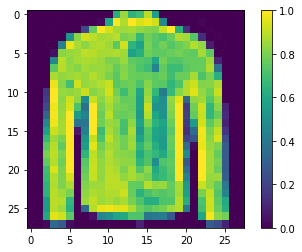

In [41]:
#proviamo a predire il tipo di abito
abito = 50
plt.figure()
plt.imshow(test_images[abito])
plt.colorbar()
plt.grid(False)
plt.show()

In [42]:
#categoria reale
tipoAbito[test_labels[abito]]

'Cappotto'

In [43]:
#categoria predetta dal modello
predictions = model.predict(test_images)
tipoAbito[np.argmax(predictions[abito])]

'Cappotto'